In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [20]:
dati=pd.read_csv("netflix.csv")
dati

,Title,IMDb Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes
0,Lets Fight Ghost,7.9,82.0,74.0,57.0,205926.0
1,Joker,8.4,59.0,112.0,228.0,951938.0
2,I,6.5,51.0,26.0,69.0,733336.0
3,Harrys Daughters,8.1,85.0,46.0,94.0,766594.0
4,The Closet,7.0,72.0,1.0,1.0,16657.0
...,...,...,...,...,...,...
2840,21,6.8,48.0,1.0,5.0,230337.0
2841,One Chance,6.8,52.0,3.0,5.0,11536.0
2842,The Twilight Saga: Breaking Dawn: Part 1,4.9,45.0,11.0,22.0,224372.0
2843,One for the Money,5.3,22.0,1.0,1.0,40841.0


### Modello
regressione lineare che preveda il numero di premi (Awards received) a partire dai voti(IMDb Votes)

y=F(x)

*x=IMDb Votes

*y=awartds received

In [21]:
dati=dati[["IMDb Votes","Awards Received"]]
dati.dropna(inplace=True)
dati

/tmp/ipykernel_6370/3113308698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dati.dropna(inplace=True)


,IMDb Votes,Awards Received
0,205926.0,74.0
1,951938.0,112.0
2,733336.0,26.0
3,766594.0,46.0
4,16657.0,1.0
...,...,...
2840,230337.0,1.0
2841,11536.0,3.0
2842,224372.0,11.0
2843,40841.0,1.0


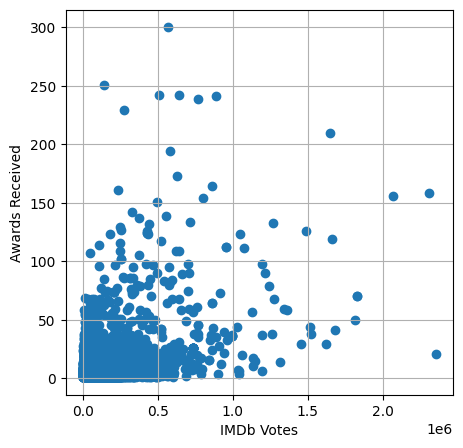

In [22]:
fig,ax=plt.subplots(figsize=(5,5))
ax.scatter(dati["IMDb Votes"],dati["Awards Received"])
ax.set_xlabel("IMDb Votes")
ax.set_ylabel("Awards Received")
ax.grid()
plt.show()

In [23]:
X=dati["IMDb Votes"].values
X

array([205926., 951938., 733336., ..., 224372.,  40841.,  40425.])

In [24]:
Y=dati["Awards Received"].values
Y

array([ 74., 112.,  26., ...,  11.,   1.,   1.])

In [25]:
X_norm=(X-np.mean(X))/np.std(X)
X_norm

array([ 0.21955344,  3.50529898,  2.54248532, ...,  0.30079726,
       -0.50754921, -0.50938145])

In [26]:
Y_norm=(Y-np.mean(Y))/np.std(Y)
Y_norm

array([ 2.58111552,  4.17768944,  0.56439058, ..., -0.06583597,
       -0.485987  , -0.485987  ])

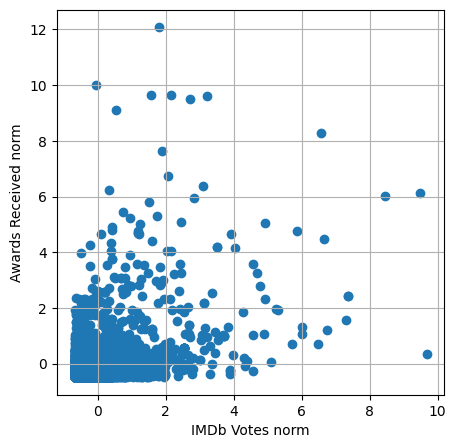

In [27]:
fig,ax=plt.subplots(figsize=(5,5))
ax.scatter(X_norm,Y_norm)
ax.set_xlabel("IMDb Votes norm")
ax.set_ylabel("Awards Received norm")
ax.grid()
plt.show()

In [31]:
X_norm_2d=X_norm[:,np.newaxis]

## Non Dividiamo in dataset di training e dataset di test

In [38]:
modello=LinearRegression(n_jobs=100) #crea istanza del modello non addestrat
modello.fit(X_norm_2d,Y_norm)

LinearRegression(n_jobs=100)

In [40]:
modello.score(X_norm_2d,Y_norm)

0.1863268851464419

In [43]:
coef_ango=modello.coef_

In [ ]:
array_x=np.linspace(0,12,1000)
array_y=coef_ango*array_x


